**-**

Janusz Utrata, 
Szymon Kuliński, 
Piotr Głownia, 
Bartosz Sroczyński

**-**

# Zbiór danych 
Data set: https://archive.ics.uci.edu/ml/datasets/wine+quality

Zbiór danych zawiera listę wybranych, czerwonych, portugalskich win, wraz z ich właściwościami chemicznymi, takimi jak odczyn pH, zawartość cukru, zawartość siarczanów itp.

Ponadto każde z win posiada arbitralnie dobrany współczynnik jakości - quality.

Naszym zadaniem było sprawdzenie możliwości przewidzenia jakości danego wina, w oparciu o jego charakterystykę chemiczną.






# Import niezbędnych bibliotek

Do wykonania analizy posłużyliśmy się bibliotekami: Seaborn oraz Pandas.

Do wykonania wizualizacji wykorzystaliśmy bibliotekę Matplotlib

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme()


# Import Danych, oraz analiza wstępna

Dane zostały wczytane za pomocą polecenia *read_csv*.

Po ich zaimportowaniu, wyświetliliśmy nagłówek tabeli, oraz kilka pierwszych rekordów. Dzięki temu łatwiej jest nam zrozumieć jaki charakter mają analizowane przez nas dane.



In [28]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data_frame = pd.read_csv(url, sep=";")
wine_data_frame.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

Heatmap pozwala nam na zrozumienie korelacji pomiędzy quality, oraz cechami win.

Obiektem naszego zainteresowania jest wyłącznie quality, zatem do tej analizy wykorzystujemy tylko ostatni wiersz / kolumnę.




Pierwsze spostrzeżenie to związek pomiędzy jakością a zawartością alkocholu. 

Na uwagę zasługuje również to, że jakość wydaje się być odwrotnie proporcjonalna do współczynnika *volatile acidity* (kwasowość lotna).

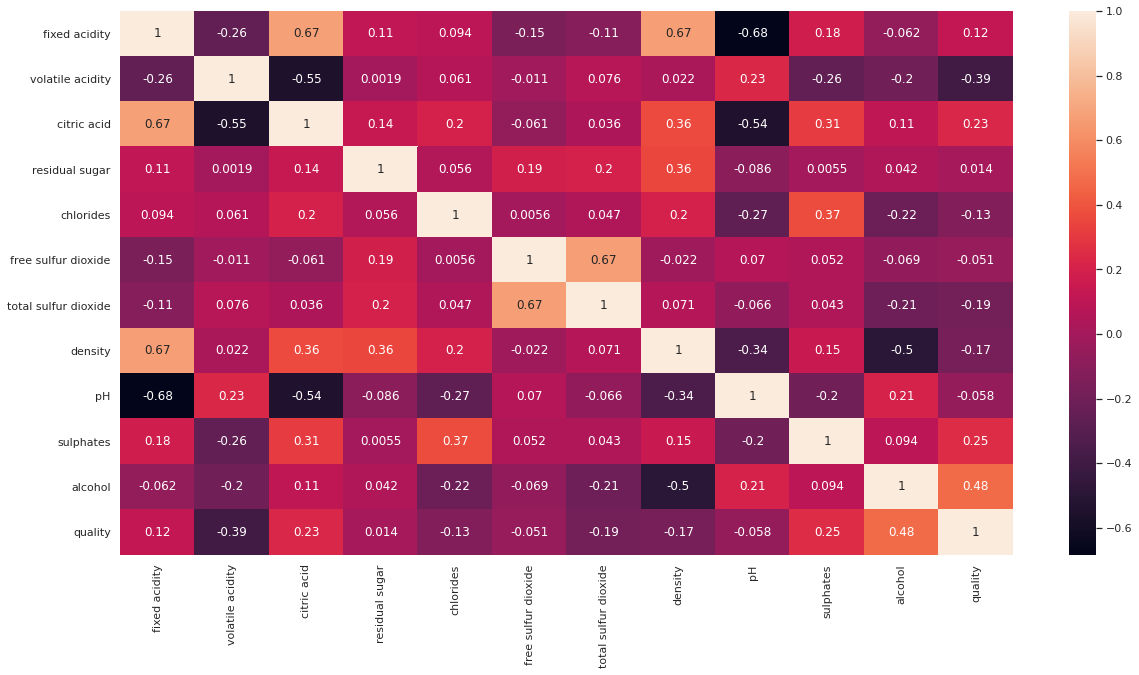

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(wine_data_frame.corr(), annot=True)

Podobnie jak w powyższym, zestawiamy dane “każdy z każdym”, ale koncentrujemy się wyłącznie
na związku quality, z każdym innym współczynnikiem.

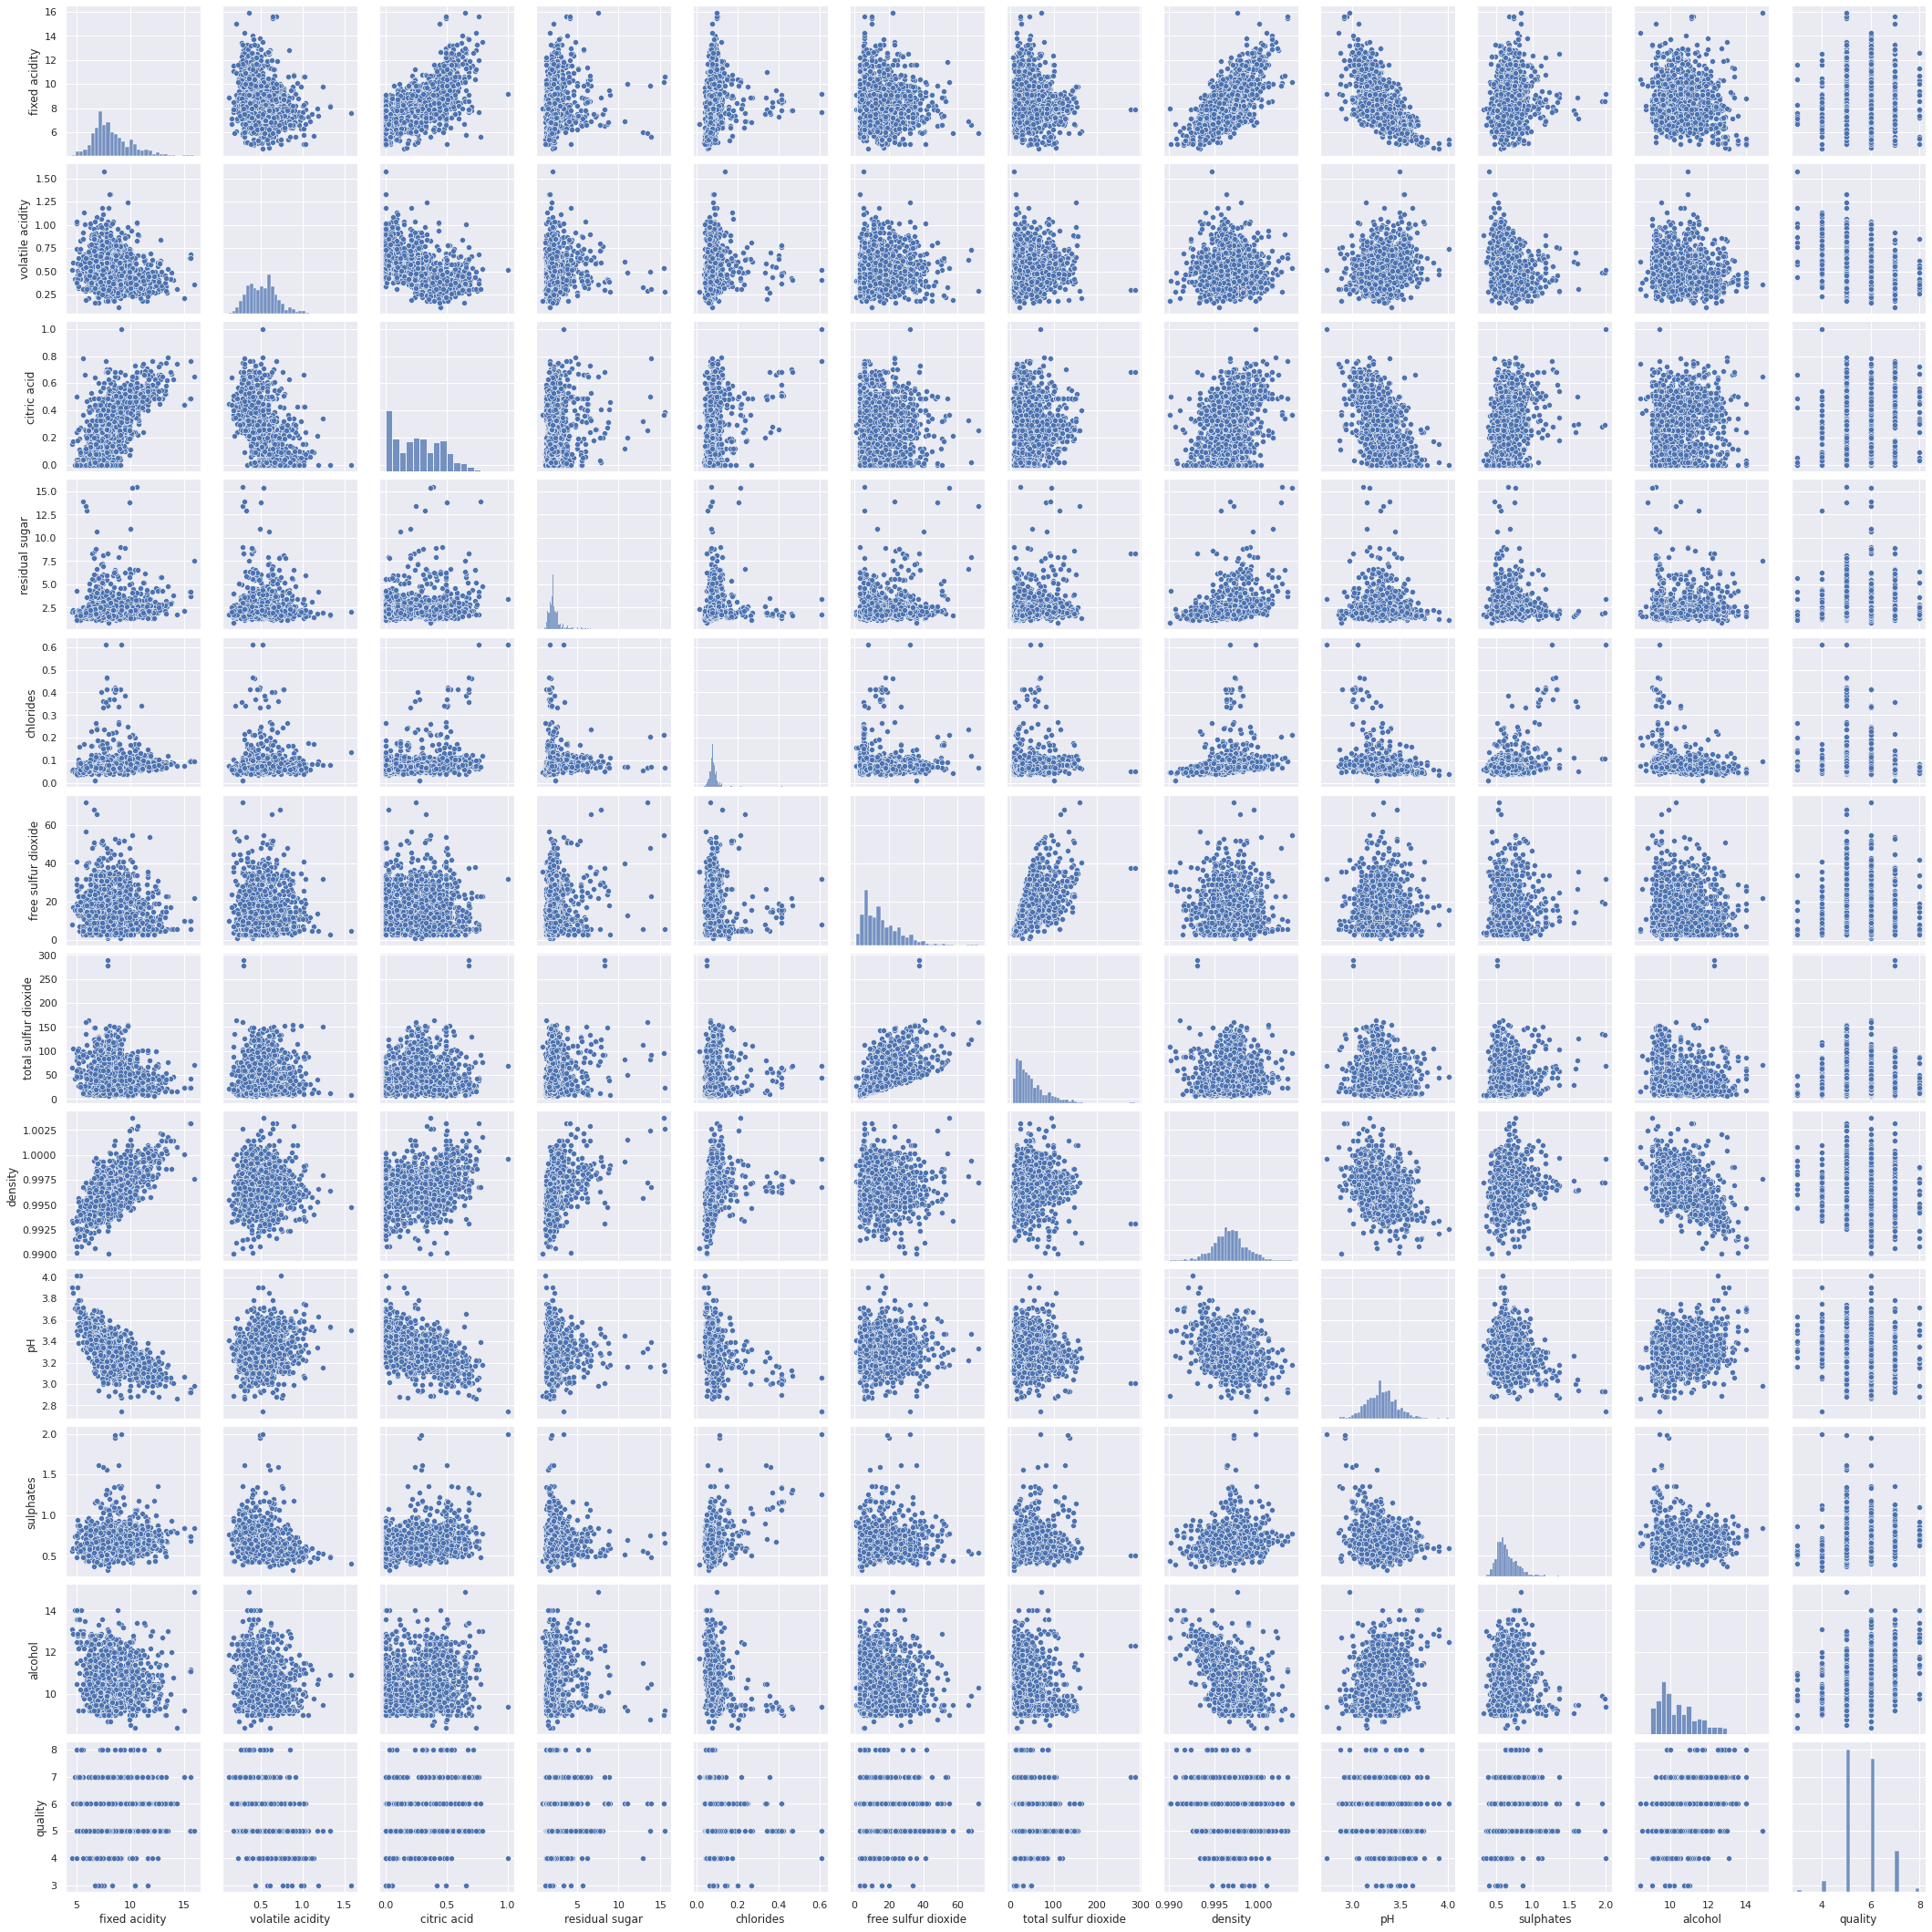

In [18]:
sns.pairplot(data=wine_data_frame)




Dodatkowo korzystając z funkcji *describe* sprawdzamy jaki charakter mają dane pod względem prostych narzędzi statystycznych. Tu znów koncentrujemy się na polu *quality*.

Dzięki temu krokowi, łatwiej będzie nam zdyskretyzować "poziomy jakości".

In [19]:
wine_data_frame.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

# Klasyfikacja Binarna

Na podstawie arbitralnie dobranego kryterium dzielimy wina na dobre i złe. Jako dobre klasyfikujemy te, których wartość quality jest większa od 5,5.

In [20]:
wine_data_frame['binar quality'] =  pd.cut(wine_data_frame['quality'], bins=(2, 5.5, 8), labels=['bad', 'good'])
wine_data_frame


fixed acidity  volatile acidity  ...  quality  binar quality
0               7.4             0.700  ...        5            bad
1               7.8             0.880  ...        5            bad
2               7.8             0.760  ...        5            bad
3              11.2             0.280  ...        6           good
4               7.4             0.700  ...        5            bad
...             ...               ...  ...      ...            ...
1594            6.2             0.600  ...        5            bad
1595            5.9             0.550  ...        6           good
1596            6.3             0.510  ...        6           good
1597            5.9             0.645  ...        5            bad
1598            6.0             0.310  ...        6           good

[1599 rows x 13 columns]

Dzięki metodzie *LabelEncoder* przekształcamy dane do bardziej przydatnej formy.

Ponadto wyświelamy ilość dobrych (0) i złych (1) win.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


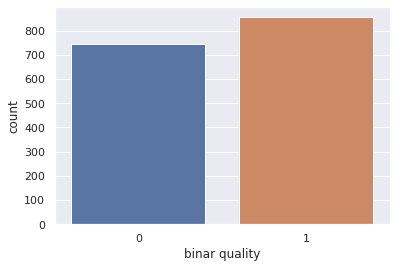

In [21]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
wine_data_frame['binar quality'] = labelEncoder.fit_transform(wine_data_frame['binar quality'].astype('str'))
wine_data_frame['binar quality'].value_counts()
sns.countplot(wine_data_frame['binar quality'])

# Uczenie maszynowe

Zestawiamy ze sobą dane quality, oraz ich klasyfikacje binarną.

Posłużą one do późniejszego podziału na zbiór treningowy oraz testowy.

In [22]:
X = wine_data_frame.drop(['quality', 'binar quality'], axis=1)
y = wine_data_frame['binar quality']

Poniżej wspomniany podział na zbiór testowy i treningowy.

Uznaliśmy, że do nauki wystarczy 1/3 zbioru bazowego.

Argument *random_state* to tzw. ziarno. Na jego podstawie generowany jest przebieg działania algorytmu uczącego.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Algorytm Lasu Losowego

Pomimo wykorzystywania przez nas tylko jednej trzeciej zbioru, do celów nauczania maszynowego, wciąż istnieje zagrożenie przetrenowania (overfittingu). 

Dzieje się tak gdy nadmierna ilość danych treningowych względem zbioru testowego zbyt dobrze dopasowuje się do naszych oczekiwań.

Wykorzystana poniżej implementacja tzw. Lasu Losowego rozwiązuje ten problem.

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       238
           1       0.82      0.83      0.83       290

    accuracy                           0.81       528
   macro avg       0.81      0.80      0.80       528
weighted avg       0.81      0.81      0.81       528




Powyżej zostały przedstawione wyniki działania algorytmu Lasu Losowego.

Jak widać zarówno wartość predykcyjna (precision), jak i czułość (recall) to mniej więcej 80%.

Poniżej przedstawione zostały definicje tych pojęć.

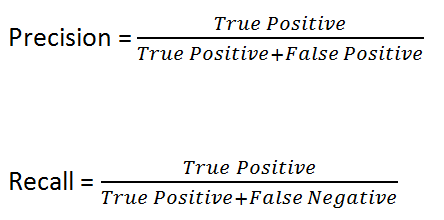



# Klasyfikator SGD

Stochastic Gradient Descent jest algorytmem, który pozwala poprawić wyniki uczenia maszynowego poprzez wprowadzenie "systemu kar".

Każda iteracja modelu jest sprawdzana pod kątem poprawności. Na tym poziomie wyznaczana jest tzw. funkcja kosztu, którą optymalizujemy (zmieniamy wagę parametru) "nagradzając" dobre przewidywania i "karając" błędne.


In [25]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty='l2')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       238
           1       0.73      0.69      0.71       290

    accuracy                           0.69       528
   macro avg       0.69      0.69      0.69       528
weighted avg       0.69      0.69      0.69       528



Jak widać, metoda ta okazała się w tym przypadku dużo mniej skuteczna od Lasu Losowego. Możliwym powodem jest niewielka (nominalnie) liczba elementów zbioru treningowego.

# Klasyfikator SVC

Support Vector Machine jest algorytmem, który pozwala radzić sobie z "trudnymi przypadkami". Metoda ta koncentruje się na cechach anomalnych, nadając im odpowiednie wagi.

W naszym przykładzie, sytuacją anomalną byłoby np. idealne pod każdym prawie względem wino, które jednakże posiada ekstremalnie wysoką zawartość siarczanów.

Poniżej przykład modelowego problemu, z którym radzi sobie SVC:

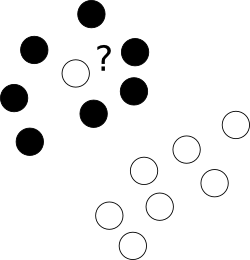

Wykorzystanie SVC w naszym przypadku:

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.71      0.36      0.48       238
           1       0.63      0.88      0.73       290

    accuracy                           0.65       528
   macro avg       0.67      0.62      0.60       528
weighted avg       0.67      0.65      0.62       528



Jak widać powyżej, SVC nie jest tu najlepszym algorytmem. Możliwym powodem jest brak występowania wyżej wspomnianych anomalii.

# Podsumowanie

W naszej analizie wykorzystaliśmy trzy różne algorytmy uczenia maszynowego: Las Losowy, klasyfikację SGD, oraz klasyfikację SVC.

Najlepszy rezultat przyniosło użycie algorytmu Lasu Losowego. 

Dobrany przez nas zbiór danych pozwolił na stworzenie zbioru treningowego liczącego 533 elementy. Naszym zdaniem jest to dość niewielka liczba, której zwiększenie mogłoby poprawić działanie algorytmów.

Mając na uwadze powyższe, wyniki Lasu Losowego na poziomie 80% uznajemy za satysfakcjonujące.
